<a href="https://colab.research.google.com/github/AdelSobhy/CodeAlpha-ML/blob/main/CodeAlpha_Task4_Emotion_Recognition_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [ ]:
#extrating paths and labels
paths = []
labels = []
for dirname, _, filenames in os.walk('D:\speech_recognition'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
paths[:3]

['D:\\speech_recognition\\YAF_angry\\YAF_back_angry.wav',
 'D:\\speech_recognition\\YAF_angry\\YAF_bar_angry.wav',
 'D:\\speech_recognition\\YAF_angry\\YAF_base_angry.wav']

In [ ]:
labels[:3]

['angry', 'angry', 'angry']

In [ ]:
#converting to a dataframe
df=pd.DataFrame()
df['audio']=paths
df['target']=labels

In [ ]:
df.head(5)

,audio,target
0,D:\speech_recognition\YAF_angry\YAF_back_angry...,angry
1,D:\speech_recognition\YAF_angry\YAF_bar_angry.wav,angry
2,D:\speech_recognition\YAF_angry\YAF_base_angry...,angry
3,D:\speech_recognition\YAF_angry\YAF_bath_angry...,angry
4,D:\speech_recognition\YAF_angry\YAF_bean_angry...,angry


<Axes: xlabel='target', ylabel='count'>

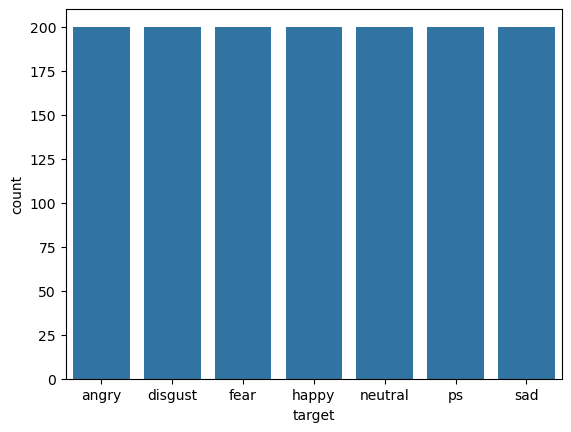

In [ ]:
#checking for any imbalance
sns.countplot(data=df,x='target')

In [ ]:
#waveplot function
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,5))
    plt.title(emotion,size=25)
    librosa.display.waveshow(data,sr=sr)

In [ ]:
#spectogram function
def spectogram(data,sr,emotion):
    x = librosa.stft(data)
    x_db = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(x_db, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

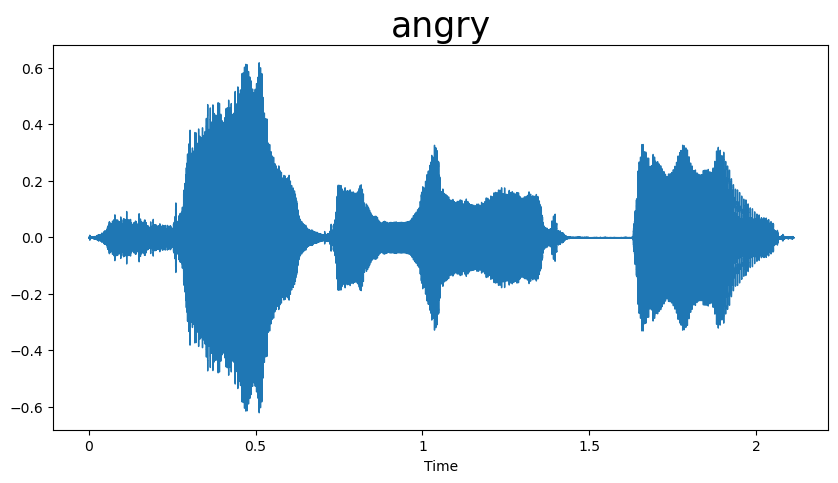

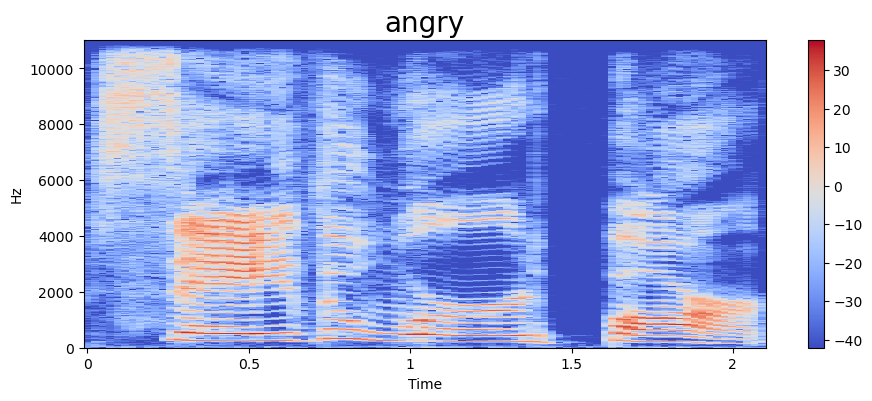

In [ ]:
## For emotion Angry
emotion = 'angry'
path = np.array(df['audio'][df['target']==emotion])[1]
data, sr = librosa.load(path)
waveplot(data, sr, emotion)
spectogram(data, sr, emotion)
Audio(path)

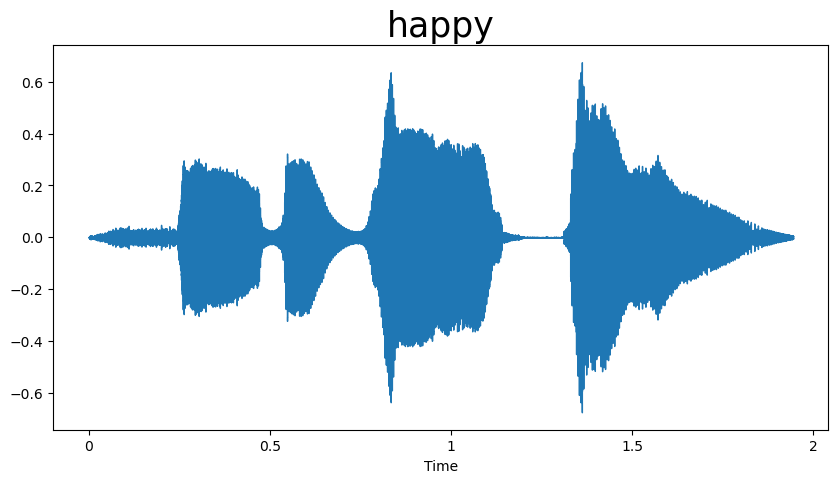

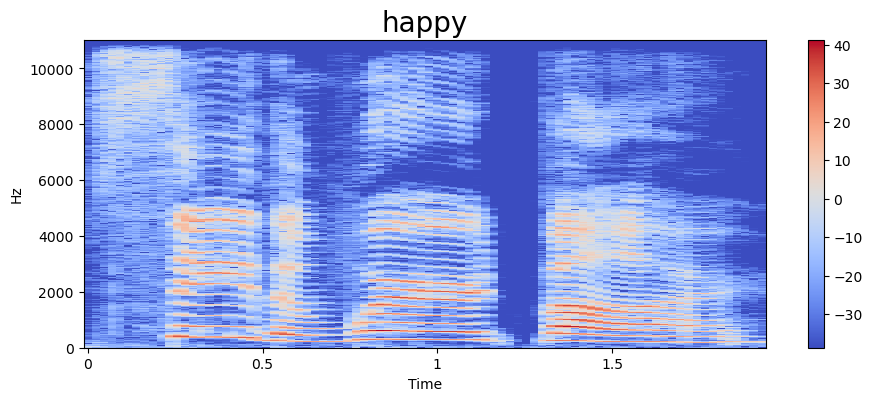

In [ ]:
## For emotion Angry
emotion = 'happy'
path = np.array(df['audio'][df['target']==emotion])[1]
data, sr = librosa.load(path)
waveplot(data, sr, emotion)
spectogram(data, sr, emotion)
Audio(path)

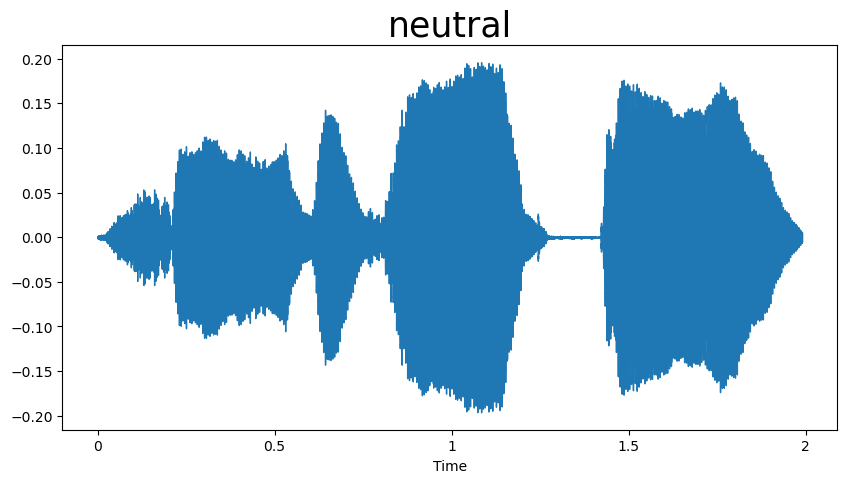

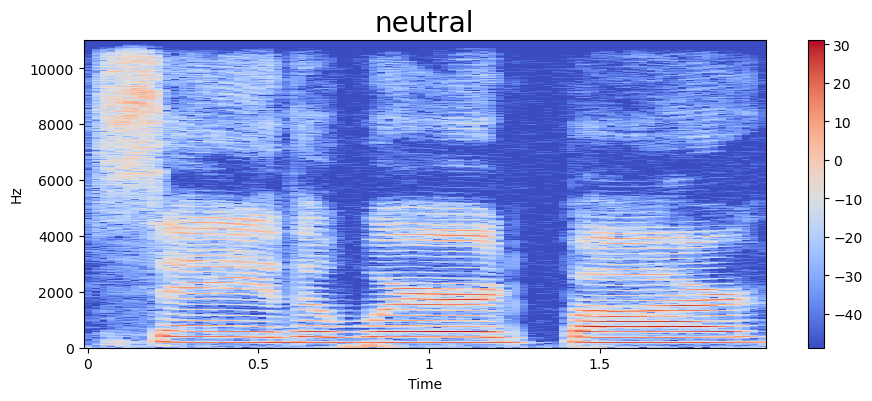

In [ ]:
## For emotion neutral
emotion = 'neutral'
path = np.array(df['audio'][df['target']==emotion])[1]
data, sr = librosa.load(path)
waveplot(data, sr, emotion)
spectogram(data, sr, emotion)
Audio(path)

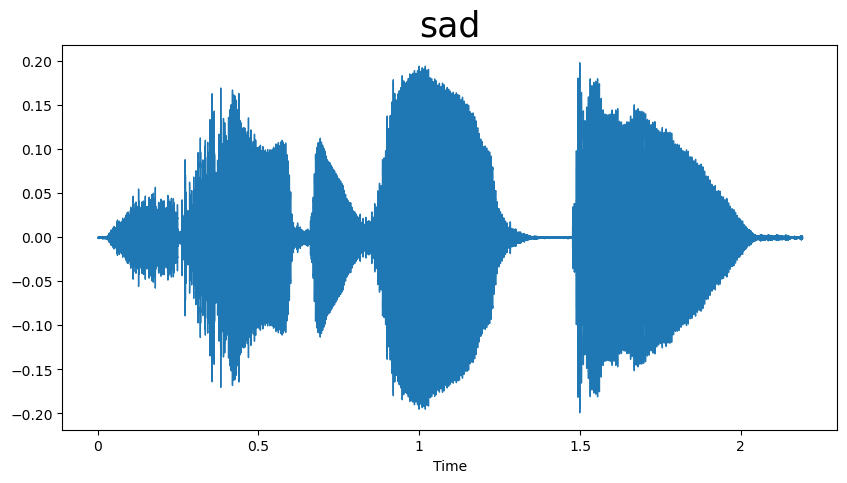

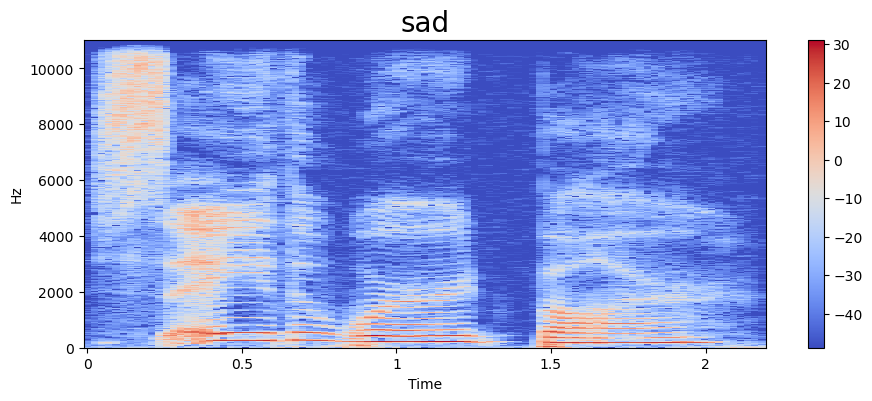

In [ ]:
## For emotion sad
emotion = 'sad'
path = np.array(df['audio'][df['target']==emotion])[1]
data, sr = librosa.load(path)
waveplot(data, sr, emotion)
spectogram(data, sr, emotion)
Audio(path)

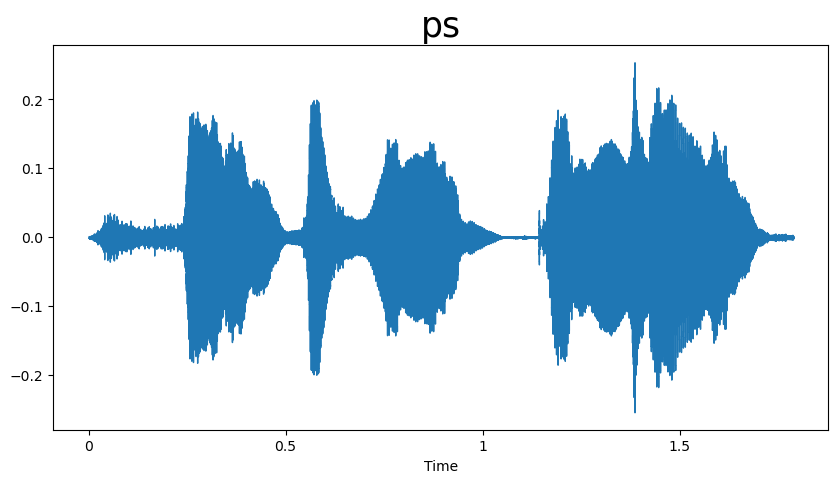

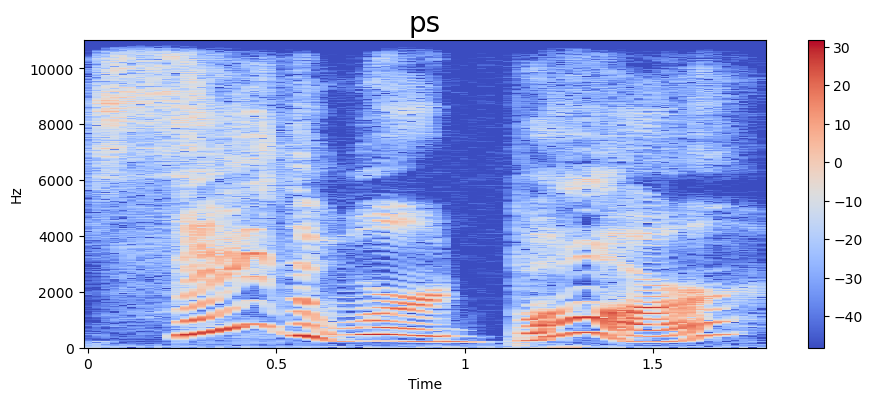

In [ ]:
## For pleasant surpise
emotion = 'ps'
path = np.array(df['audio'][df['target']==emotion])[1]
data, sr = librosa.load(path)
waveplot(data, sr, emotion)
spectogram(data, sr, emotion)
Audio(path)

In [ ]:
#extracting 40 features off the audio files
def extract_mfcc(filename):
    aud_sig, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=aud_sig, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
X_mfcc=df['audio'].apply(lambda y: extract_mfcc(y))

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(1400, 40)

In [ ]:
X = np.expand_dims(X, -1)
X.shape

In [ ]:
#targets
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['target']])
y=y.toarray()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout

In [ ]:
model = Sequential()

model.add(LSTM(256, return_sequences=False, input_shape=(40, 1)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.4388 - loss: 1.5608 - val_accuracy: 0.0000e+00 - val_loss: 4.6324
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.8218 - loss: 0.5178 - val_accuracy: 0.2571 - val_loss: 5.2948
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.8869 - loss: 0.2957 - val_accuracy: 0.2750 - val_loss: 6.7078
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.9452 - loss: 0.1562 - val_accuracy: 0.2714 - val_loss: 7.4149
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.9692 - loss: 0.1011 - val_accuracy: 0.2643 - val_loss: 8.1684
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.9765 - loss: 0.0819 - val_accuracy: 0.2393 - val_loss: 8.7866
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - accuracy: 0.9774 - loss: 0.0853 - val_accuracy: 0.2536 - val_loss: 8.3110
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.9781 - loss: 0.0948 - val_accuracy: 

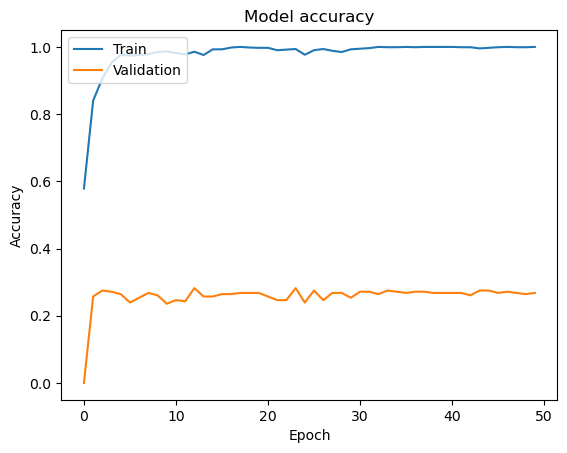

Final Training Accuracy: 1.0


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
final_train_accuracy = history.history['accuracy'][-1]
print(f'Final Training Accuracy: {final_train_accuracy}')

In [ ]:
emotion_labels = ['angry', 'happy', 'sad', 'surprised', 'neutral', 'disgusted', 'fearful']

In [ ]:
prediction = model.predict(np.expand_dims(X[4], axis=0))

# Get the predicted class index
predicted_class = np.argmax(prediction, axis=1)

predicted_emotion = emotion_labels[predicted_class[0]]
print(predicted_emotion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
angry


In [ ]:
df

,audio,target
0,D:\speech_recognition\YAF_angry\YAF_back_angry...,angry
1,D:\speech_recognition\YAF_angry\YAF_bar_angry.wav,angry
2,D:\speech_recognition\YAF_angry\YAF_base_angry...,angry
3,D:\speech_recognition\YAF_angry\YAF_bath_angry...,angry
4,D:\speech_recognition\YAF_angry\YAF_bean_angry...,angry
...,...,...
1395,D:\speech_recognition\YAF_sad\YAF_witch_sad.wav,sad
1396,D:\speech_recognition\YAF_sad\YAF_yearn_sad.wav,sad
1397,D:\speech_recognition\YAF_sad\YAF_yes_sad.wav,sad
1398,D:\speech_recognition\YAF_sad\YAF_young_sad.wav,sad
